# Understanding the Dynamics of Road Accidents

# Questions
- Is there a correlation between road surface conditions and the severity of accidents?
- Are there specific weather conditions that significantly increase the risk of accidents?
- Does the presence of law enforcement impact accident severity or frequency?
- What are the primary factors that contribute to the severity of accidents?

In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/home/jamshaid/Documents/xls/AccidentLondonBoroughs2223.csv")
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680,178240,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170,181650,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520,182240,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900,177530,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060,179040,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [33]:
import warnings


warnings.filterwarnings("ignore")





# Westminster Data

In [34]:
df = df[df["Local_Authority_Highway"] == "E09000033"]
df.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
137803,201001TB00647,529920,180790,-0.129195,51.511055,1,3,1,1,03/10/2010,...,0,0,4,1,1,0,0,1,1,E01004734
137821,201001TB00669,526260,181750,-0.181565,51.520511,1,3,2,1,29/09/2010,...,0,0,1,2,2,0,0,1,1,E01004757
137823,201001TB00671,525810,180760,-0.188401,51.511714,1,3,1,1,09/10/2010,...,0,0,1,1,1,0,0,1,1,E01004693
137825,201001TB00673,526230,181410,-0.182119,51.517462,1,3,2,1,02/10/2010,...,0,0,1,1,1,0,0,1,1,E01004681
137887,201001TB00765,526330,181800,-0.180539,51.520945,1,3,2,1,17/10/2010,...,0,0,4,1,1,0,0,1,1,E01004702


In [35]:
df=df.drop(columns=['Local_Authority_District',"Police_Force","1st_Road_Class",'Latitude',"Longitude","1st_Road_Class","Time","Accident_Index","Accident_Index","Date","Local_Authority_Highway","Local_Authority_Highway","LSOA_of_Accident_Location","Urban_or_Rural_Area"],axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8855 entries, 31 to 137887
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Location_Easting_OSGR                        8855 non-null   int64
 1   Location_Northing_OSGR                       8855 non-null   int64
 2   Accident_Severity                            8855 non-null   int64
 3   Number_of_Vehicles                           8855 non-null   int64
 4   Number_of_Casualties                         8855 non-null   int64
 5   Day_of_Week                                  8855 non-null   int64
 6   1st_Road_Number                              8855 non-null   int64
 7   Road_Type                                    8855 non-null   int64
 8   Speed_limit                                  8855 non-null   int64
 9   Junction_Detail                              8855 non-null   int64
 10  Junction_Control          

Table summarizing the processing and data preparation phases for the given features:

| #  | Feature                       | Data Type   | Processing Steps                                     |
|----|-------------------------------|-------------|------------------------------------------------------|
| 1  | Accident Index               | Categorical | -                                                    |
| 2  | Location Easting OSGR        | Numerical   | Scaling/Normalization                               |
| 3  | Location Northing OSGR       | Numerical   | Scaling/Normalization                               |
| 4  | Longitude                     | Numerical   | Scaling/Normalization (Geospatial Feature)            |
| 5  | Latitude                      | Numerical   | Scaling (Geospatial Feature)                          |
| 6  | Police Force                  | Categorical | One-Hot Encoding                                     |
| 7  | Accident Severity             | Categorical | Ordinal Encoding                                     |
| 8  | Number of Vehicles            | Numerical   | -  Standardisation                                                  |
| 9  | Number of Casualties          | Numerical   | -  Normalization                                                  |
| 10 | Date                          | Date/Time   | Feature Engineering (Date/Time)                      |
| 11 | Time                          | Date/Time   | Feature Engineering (Date/Time)                      |
| 12 | Local Authority District      | Categorical |   Encoding                                                 |
| 13 | Local Authority Highway       | Categorical |   Encoding                                                   |
| 14 | Day of the Week               | Categorical | One hot Encoding                                             |
| 15 | 1st road class                | Numerical   | - Encoding                                                     |
| 16 | 1st road number               | Numerical   | -   Normalization                                                  |
| 17 | 2nd road class                | Numerical   | -  Encoding                                                 |
| 18 | 2nd road number               | Numerical   | - Normalization                                                    |
| 19 | Road type                     | Categorical | One-Hot Encoding                                     |
| 20 | Speed limit                   | Numerical   |                                        |
| 21 | Junction detail               | Categorical | Encoding                                             |
| 22 | Junction control              | Categorical | Encoding                                             |
| 23 | Pedestrian crossing Human control | Categorical | Encoding                                          |
| 24 | Pedestrian crossing Physical facilities | Categorical | Encoding                                   |
| 25 | Light conditions               | Categorical | Encoding                                             |
| 26 | Weather conditions             | Categorical | Encoding                                             |
| 27 | Road surface conditions        | Categorical | Encoding                                             |
| 28 | Special conditions at site     | Categorical | Encoding                                             |
| 29 | Carriageway hazards            | Categorical | Encoding                                             |
| 30 | Urban or rural areas           | Categorical | One-Hot Encoding                                     |
| 31 | Did police officer attend scene of accident | Binary | Binary Encoding                               |
| 32 | LSOA of accident location      | Categorical | Encoding                                             |

This table provides an overview of the data types, processing steps, and encoding methods applied to each feature during.

## Basic statistics of the data

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,8855.0,528226.510446,1532.457922,523830.0,527130.0,528450.0,529420.0,531130.0
Location_Northing_OSGR,8855.0,180882.437041,1175.210318,177850.0,180190.0,181000.0,181700.0,183890.0
Accident_Severity,8855.0,2.824054,0.400457,1.0,3.0,3.0,3.0,3.0
Number_of_Vehicles,8855.0,1.638283,0.583682,1.0,1.0,2.0,2.0,6.0
Number_of_Casualties,8855.0,1.137662,0.480615,1.0,1.0,1.0,1.0,10.0
Day_of_Week,8855.0,4.133258,1.881657,1.0,3.0,4.0,6.0,7.0
1st_Road_Number,8855.0,886.392885,1536.712899,0.0,0.0,41.0,501.0,5205.0
Road_Type,8855.0,5.114850,1.568416,1.0,3.0,6.0,6.0,9.0
Speed_limit,8855.0,30.204969,2.070395,10.0,30.0,30.0,30.0,70.0
Junction_Detail,8855.0,3.434218,2.448231,0.0,1.0,3.0,6.0,9.0


## The dataset includes information about accidents in Westminster  . Key details cover location, accident severity, vehicles, casualties, road characteristics, junction details, pedestrian crossings, weather conditions, and police attendance. Each column provides statistical insights into the respective data, offering a comprehensive overview for analysis and modeling.

## Total Numbers

In [38]:
df.shape

(8855, 21)

### Checking Null Values

In [39]:
df.isnull().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_at_Site                     0
Carriageway_Hazards                            0
Did_Police_Officer_A

# Mean

In [40]:
column_means = df.mean()
print(column_means)


Location_Easting_OSGR                          528226.510446
Location_Northing_OSGR                         180882.437041
Accident_Severity                                   2.824054
Number_of_Vehicles                                  1.638283
Number_of_Casualties                                1.137662
Day_of_Week                                         4.133258
1st_Road_Number                                   886.392885
Road_Type                                           5.114850
Speed_limit                                        30.204969
Junction_Detail                                     3.434218
Junction_Control                                    2.050932
2nd_Road_Class                                      3.308300
2nd_Road_Number                                   412.636702
Pedestrian_Crossing-Human_Control                   0.003727
Pedestrian_Crossing-Physical_Facilities             2.079729
Light_Conditions                                    1.968605
Weather_Conditions      

### Skewness and Kurtosis

In [41]:
from scipy.stats import skew, kurtosis

column_skewness = df.apply(skew)


print("Skewness:")
print(column_skewness)



Skewness:
Location_Easting_OSGR                          -0.541175
Location_Northing_OSGR                         -0.238296
Accident_Severity                              -2.054825
Number_of_Vehicles                              0.530150
Number_of_Casualties                            5.729275
Day_of_Week                                    -0.082147
1st_Road_Number                                 1.615191
Road_Type                                      -1.253358
Speed_limit                                     9.013391
Junction_Detail                                -0.024054
Junction_Control                               -0.559795
2nd_Road_Class                                 -0.659275
2nd_Road_Number                                 2.930345
Pedestrian_Crossing-Human_Control              23.081852
Pedestrian_Crossing-Physical_Facilities         0.445145
Light_Conditions                                0.865673
Weather_Conditions                              5.276280
Road_Surface_Conditio


Here's an interpretation of the skewness values for the features:

1. **Negatively Skewed Features (Skewness < 0):**
   - **Location_Easting_OSGR:** Slightly negatively skewed, indicating a longer left tail.
   - **Location_Northing_OSGR:** Slightly negatively skewed.
   - **Accident_Severity:** Moderately negatively skewed. This suggests that the data may have a tail on the left side, and more accidents tend to be less severe.
   - **Day_of_Week:** Slightly negatively skewed.
   - **Junction_Control:** Negatively skewed, indicating a longer left tail.

2. **Positively Skewed Features (Skewness > 0):**
   - **Number_of_Vehicles:** Positively skewed, indicating a longer right tail. More accidents tend to involve fewer vehicles.
   - **1st_Road_Number:** Positively skewed.
   - **Road_Type:** Positively skewed.
   - **Speed_limit:** Highly positively skewed, indicating a substantial right tail.
   - **2nd_Road_Class:** Positively skewed.
   - **Pedestrian_Crossing-Physical_Facilities:** Positively skewed.
   - **Light_Conditions:** Positively skewed.
   - **Weather_Conditions:** Highly positively skewed.
   - **Road_Surface_Conditions:** Positively skewed.
   - **Special_Conditions_at_Site:** Highly positively skewed.
   - **Carriageway_Hazards:** Highly positively skewed.
   - **Did_Police_Officer_Attend_Scene_of_Accident:** Positively skewed.

3. **Interpretation:**
   - Positive skewness indicates that the right tail of the distribution is longer or fatter than the left, and negative skewness indicates the opposite.
   - Highly skewed features may require special attention during analysis. For example, when building predictive models, transformations may be applied to reduce skewness and achieve a more normal distribution.

4. **Considerations:**
   - Evaluate the impact of skewness on the assumptions of statistical tests or machine learning models.
   - Depending on your analysis goals, you may choose to apply transformations to reduce skewness for certain features.



In [42]:
column_kurtosis = df.apply(kurtosis)
print("\nKurtosis:")
print(column_kurtosis)


Kurtosis:
Location_Easting_OSGR                           -0.372122
Location_Northing_OSGR                          -0.259016
Accident_Severity                                3.217457
Number_of_Vehicles                               1.046440
Number_of_Casualties                            52.339339
Day_of_Week                                     -1.121406
1st_Road_Number                                  0.918392
Road_Type                                       -0.031117
Speed_limit                                    105.628325
Junction_Detail                                 -1.127347
Junction_Control                                -1.045302
2nd_Road_Class                                  -1.007609
2nd_Road_Number                                  7.097105
Pedestrian_Crossing-Human_Control              537.170715
Pedestrian_Crossing-Physical_Facilities         -1.599375
Light_Conditions                                -0.994160
Weather_Conditions                              29.026850
Roa


Here's an interpretation of the kurtosis values for the features:

1. **Negative Kurtosis (Kurtosis < 0):**
   - **Location_Easting_OSGR:** Negatively kurtotic but close to zero.
   - **Location_Northing_OSGR:** Negatively kurtotic but close to zero.
   - **Day_of_Week:** Negatively kurtotic, indicating a distribution with lighter tails than a normal distribution.
   - **Road_Type:** Negatively kurtotic, with a flatter peak.

2. **Positive Kurtosis (Kurtosis > 0):**
   - **Accident_Severity:** Highly positively kurtotic, indicating heavy tails and a sharp peak.
   - **Number_of_Vehicles:** Positively kurtotic, indicating a distribution with heavier tails.
   - **Number_of_Casualties:** Highly positively kurtotic, suggesting a distribution with heavy tails and a sharp peak.
   - **1st_Road_Number:** Positively kurtotic, with heavier tails.
   - **Speed_limit:** Highly positively kurtotic, indicating a distribution with heavy tails and a sharp peak.
   - **2nd_Road_Number:** Positively kurtotic, indicating heavy tails.
   - **Pedestrian_Crossing-Human_Control:** Highly positively kurtotic, indicating a distribution with very heavy tails.
   - **Weather_Conditions:** Highly positively kurtotic, indicating a distribution with heavy tails and a sharp peak.
   - **Road_Surface_Conditions:** Positively kurtotic, indicating heavy tails.
   - **Special_Conditions_at_Site:** Highly positively kurtotic, suggesting a distribution with very heavy tails and a sharp peak.
   - **Carriageway_Hazards:** Highly positively kurtotic, indicating very heavy tails and a sharp peak.

3. **Interpretation:**
   - High kurtosis values suggest that the data has heavy tails and more extreme values than a normal distribution.
   - For features with high kurtosis, you may want to consider transformations or use statistical methods robust to outliers.

4. **Considerations:**
   - Assess the impact of kurtosis on the assumptions of statistical tests or machine learning models.
   - Be cautious about potential outliers and their influence on the distribution.



### Mode

In [43]:
column_modes = df.mode().iloc[0]
print(column_modes)

Location_Easting_OSGR                          529970
Location_Northing_OSGR                         179660
Accident_Severity                                   3
Number_of_Vehicles                                  2
Number_of_Casualties                                1
Day_of_Week                                         5
1st_Road_Number                                     0
Road_Type                                           6
Speed_limit                                        30
Junction_Detail                                     3
Junction_Control                                    2
2nd_Road_Class                                      6
2nd_Road_Number                                     0
Pedestrian_Crossing-Human_Control                   0
Pedestrian_Crossing-Physical_Facilities             0
Light_Conditions                                    1
Weather_Conditions                                  1
Road_Surface_Conditions                             1
Special_Conditions_at_Site  

### Handling null values

In [44]:
df=df.dropna()

# Duplicates

In [45]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
df=df.drop_duplicates()

        Location_Easting_OSGR  Location_Northing_OSGR  Accident_Severity  \
1710                   530840                  180750                  2   
2094                   530000                  180640                  3   
2154                   526750                  182550                  3   
2443                   528590                  179510                  3   
28959                  528860                  181190                  3   
29091                  530200                  179220                  3   
43188                  530140                  178460                  2   
53471                  526870                  181900                  3   
53520                  530070                  180460                  3   
53597                  528690                  181150                  3   
53681                  529260                  181140                  3   
75944                  529860                  180970                  3   
75990       

In [46]:
sns.pairplot(df)
plt.show()

## correlation

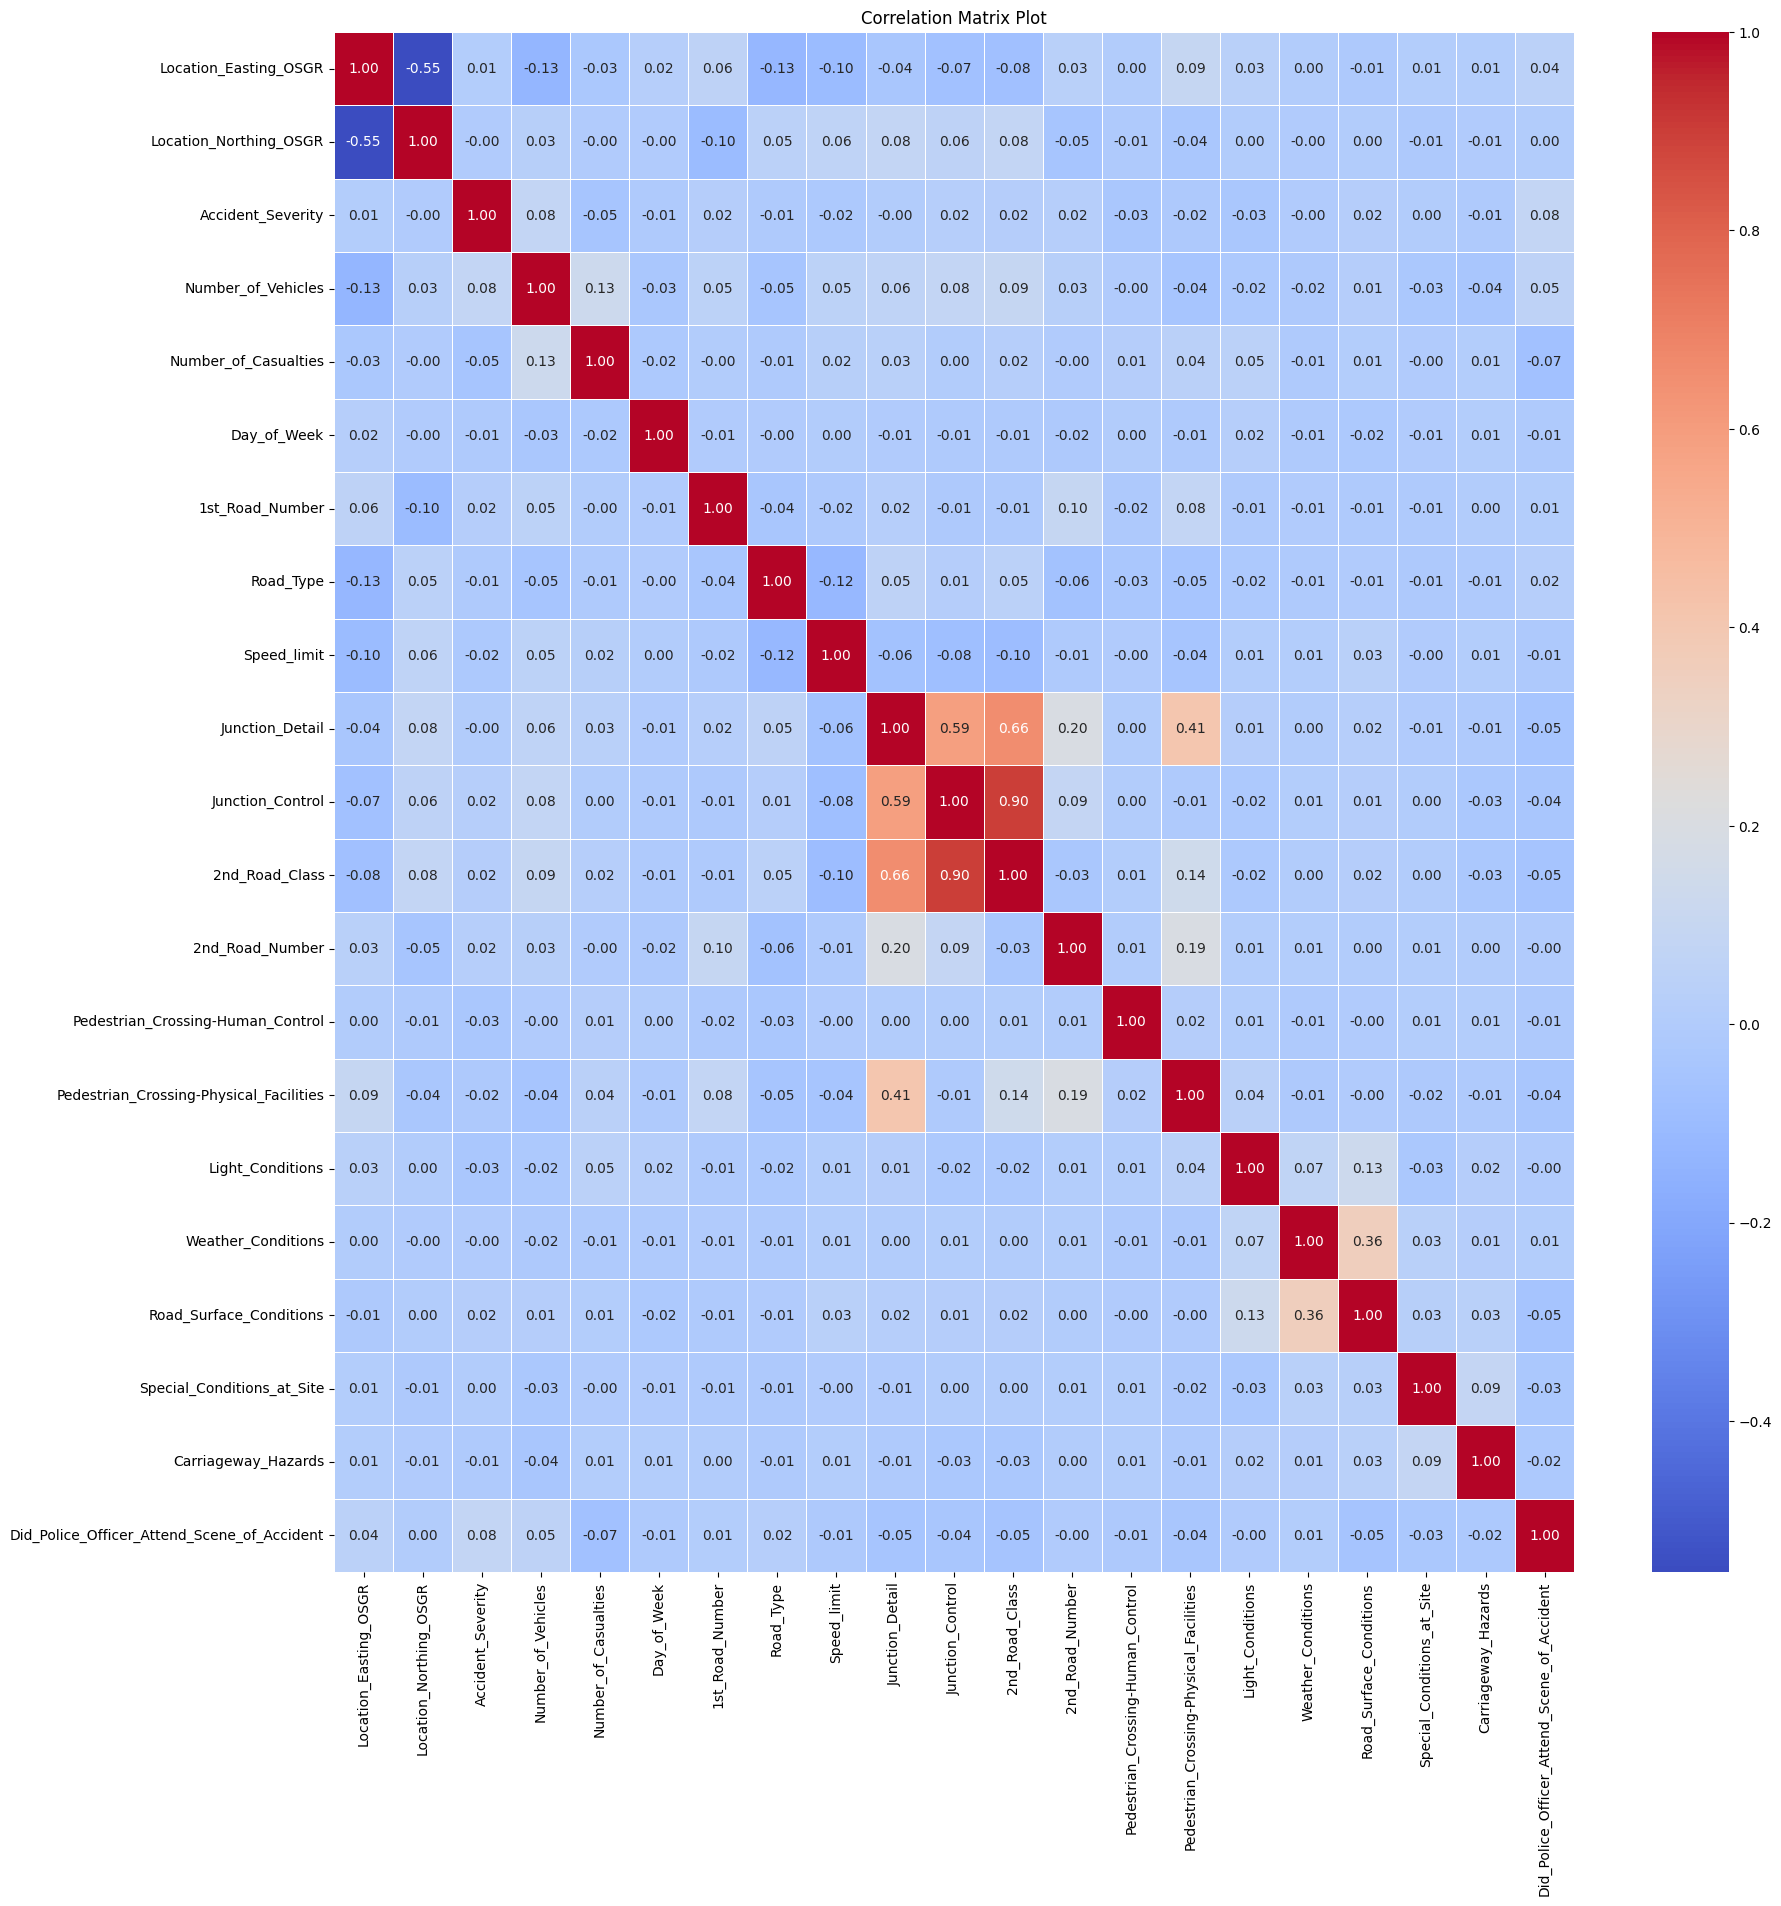

In [47]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Plot')
plt.show()

In [48]:
correlation_matrix

,Location_Easting_OSGR,Location_Northing_OSGR,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident
Location_Easting_OSGR,1.000000,-0.552152,0.007285,-0.128263,-0.026864,0.020368,0.058742,-0.126119,-0.099750,-0.040704,...,-0.078686,0.029999,0.002869,0.093705,0.032267,0.002205,-0.013659,0.009584,0.008924,0.042052
Location_Northing_OSGR,-0.552152,1.000000,-0.004301,0.025887,-0.001612,-0.003112,-0.098217,0.046159,0.061167,0.084194,...,0.078426,-0.046744,-0.008209,-0.035622,0.001598,-0.000995,0.004493,-0.014338,-0.005075,0.002819
Accident_Severity,0.007285,-0.004301,1.000000,0.080712,-0.047693,-0.011303,0.015691,-0.006573,-0.024568,-0.000321,...,0.017150,0.020270,-0.034128,-0.017117,-0.033252,-0.000457,0.015495,0.004888,-0.008415,0.082152
Number_of_Vehicles,-0.128263,0.025887,0.080712,1.000000,0.131929,-0.032826,0.053532,-0.046581,0.053523,0.063430,...,0.094503,0.029373,-0.004729,-0.043896,-0.018837,-0.017427,0.014471,-0.028000,-0.039879,0.054884
Number_of_Casualties,-0.026864,-0.001612,-0.047693,0.131929,1.000000,-0.024394,-0.000365,-0.007608,0.024302,0.030773,...,0.022133,-0.002556,0.012377,0.040144,0.047037,-0.006541,0.008021,-0.002815,0.011670,-0.069948
Day_of_Week,0.020368,-0.003112,-0.011303,-0.032826,-0.024394,1.000000,-0.006025,-0.001465,0.000357,-0.005182,...,-0.008555,-0.017897,0.000419,-0.008513,0.021534,-0.008434,-0.019997,-0.005425,0.005859,-0.012413
1st_Road_Number,0.058742,-0.098217,0.015691,0.053532,-0.000365,-0.006025,1.000000,-0.036874,-0.015758,0.023585,...,-0.006754,0.096467,-0.015501,0.081880,-0.010716,-0.005217,-0.008191,-0.009921,0.000917,0.011111
Road_Type,-0.126119,0.046159,-0.006573,-0.046581,-0.007608,-0.001465,-0.036874,1.000000,-0.117723,0.054811,...,0.045614,-0.061858,-0.031427,-0.045365,-0.023542,-0.007329,-0.005977,-0.013891,-0.009448,0.022023
Speed_limit,-0.099750,0.061167,-0.024568,0.053523,0.024302,0.000357,-0.015758,-0.117723,1.000000,-0.064421,...,-0.095281,-0.012443,-0.004398,-0.044132,0.008069,0.007184,0.030659,-0.004300,0.007304,-0.013033
Junction_Detail,-0.040704,0.084194,-0.000321,0.063430,0.030773,-0.005182,0.023585,0.054811,-0.064421,1.000000,...,0.659601,0.195193,0.004270,0.406737,0.011927,0.002143,0.021992,-0.005985,-0.007497,-0.046214



Here are some important correlations from the provided matrix:

1. **Accident Severity and Number of Casualties:** 0.080712
   - This suggests a weak positive correlation between the severity of accidents and the number of casualties.

2. **Number of Vehicles and Number of Casualties:** 0.131929
   - There is a weak positive correlation between the number of vehicles involved in an accident and the number of casualties.

3. **Junction Detail and Junction Control:** 0.590695
   - A moderate positive correlation between junction details and junction control. This indicates that certain types of junctions may be associated with specific types of junction controls.

4. **2nd Road Class and Junction Detail:** 0.659601
   - A moderate positive correlation between the classification of the second road and junction details. This suggests that the classification of the second road may be related to the type of junction.

5. **Light Conditions and Weather Conditions:** 0.068804
   - A weak positive correlation between light conditions and weather conditions.

6. **Road Surface Conditions and Weather Conditions:** 0.356340
   - A moderate positive correlation between road surface conditions and weather conditions. This suggests that certain weather conditions may be associated with specific road surface conditions.

7. **Carriageway Hazards and Special Conditions at Site:** 0.086372
   - A weak positive correlation between carriageway hazards and special conditions at the site of the accident.

8. **Did Police Officer Attend Scene of Accident and Accident Severity:** 0.082152
   - A weak positive correlation between police attendance and accident severity.

9. **Speed Limit and Road Type:** -0.117723
   - A weak negative correlation between speed limit and road type. This suggests that different road types may be associated with varying speed limits.

10. **Pedestrian Crossing-Physical Facilities and Junction Detail:** 0.406737
    - A moderate positive correlation between the presence of pedestrian crossing physical facilities and junction details. This suggests that certain types of junctions may be associated with the presence of pedestrian crossing facilities.



In [49]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

## Is there a correlation between road surface conditions and the severity of accidents?

In [50]:
correlation = df['Road_Surface_Conditions'].corr(df['Accident_Severity'])

print(f'Correlation between Road_Surface_Conditions and Accident_Severity: {correlation}')

Correlation between Road_Surface_Conditions and Accident_Severity: 0.01549515099375006


### The correlation coefficient between Road Surface Conditions and Accident Severity is 0.0155. This suggests a very weak positive correlation between the condition of the road surface and the severity of accidents. In practical terms, this correlation implies that there is a minimal association between the specific state of the road surface (such as wet, dry, icy) and the severity of accidents.

##  ttest Road_Surface_Conditions and Accident_Severity

In [51]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Road_Surface_Conditions'], df['Accident_Severity'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)


print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")


Chi-squared: 11.815335805895275
P-value: 0.15963527485795828



- **Chi-squared Statistic:** 11.815335805895275
  - This is the value of the test statistic calculated from your data. It is often used in chi-squared tests to assess the association between categorical variables.

- **P-value:** 0.15963527485795828
  - The p-value associated with the chi-squared statistic. This is the probability of observing a test statistic as extreme as the one calculated, assuming the null hypothesis is true.

- **Interpretation:**
  - With a p-value of 0.1596, it is larger than the conventional significance level of 0.05. Therefore, you would fail to reject the null hypothesis at the 0.05 significance level.

- **Conclusion:**
  - The result suggests that there is not enough evidence to conclude that there is a statistically significant association between  Road_Surface_Conditions and Accident_Severity  on the chi-squared test.



In [52]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

# Are there specific weather conditions that significantly increase the risk of accidents?


## Correlation between Weather and Accident_Severity

In [53]:
correlation_weather_severity = df['Weather_Conditions'].corr(df['Accident_Severity'])
print(f'Correlation between Weather_Conditions and Accident_Severity: {correlation_weather_severity}')

Correlation between Weather_Conditions and Accident_Severity: -0.0004570384101565626


The correlation coefficient you provided between 'Weather_Conditions' and 'Accident_Severity' is approximately -0.000457. The correlation coefficient indicates the strength and direction of a linear relationship between two variables. Here are some interpretations:

1. **Magnitude:**
   - The absolute value of the correlation coefficient is close to zero, indicating a very weak linear relationship.

2. **Direction:**
   - The negative sign indicates a very slight negative correlation. However, since the magnitude is close to zero, the correlation is practically negligible.

3. **Interpretation:**
   - In practical terms, this correlation suggests that there is almost no linear relationship between 'Weather_Conditions' and 'Accident_Severity' in your dataset.



In [54]:
df["Number_of_Casualties"].value_counts()

Number_of_Casualties
1     7888
2      750
3      120
4       30
5       17
6        7
7        2
10       1
9        1
8        1
Name: count, dtype: int64

In [55]:
unique_weather_conditions = df['Weather_Conditions'].unique()

for condition in unique_weather_conditions:
    subset = df[df['Weather_Conditions'] == condition]
    counts = subset['Number_of_Casualties'].value_counts()
    print(f"Counts for Weather Condition: {condition}")
    print(counts)
    print("\n")


Counts for Weather Condition: 9
Number_of_Casualties
1    44
2     4
4     1
Name: count, dtype: int64


Counts for Weather Condition: 1
Number_of_Casualties
1     6778
2      635
3      100
4       27
5       13
6        6
10       1
9        1
7        1
8        1
Name: count, dtype: int64


Counts for Weather Condition: 2
Number_of_Casualties
1    828
2     92
3     18
5      4
6      1
4      1
7      1
Name: count, dtype: int64


Counts for Weather Condition: 3
Number_of_Casualties
1    32
2     4
Name: count, dtype: int64


Counts for Weather Condition: 5
Number_of_Casualties
1    37
2     1
Name: count, dtype: int64


Counts for Weather Condition: 8
Number_of_Casualties
1    125
2      6
4      1
3      1
Name: count, dtype: int64


Counts for Weather Condition: 7
Number_of_Casualties
1    6
2    2
Name: count, dtype: int64


Counts for Weather Condition: 4
Number_of_Casualties
1    36
2     6
3     1
Name: count, dtype: int64


Counts for Weather Condition: 6
Number_of_Casualt

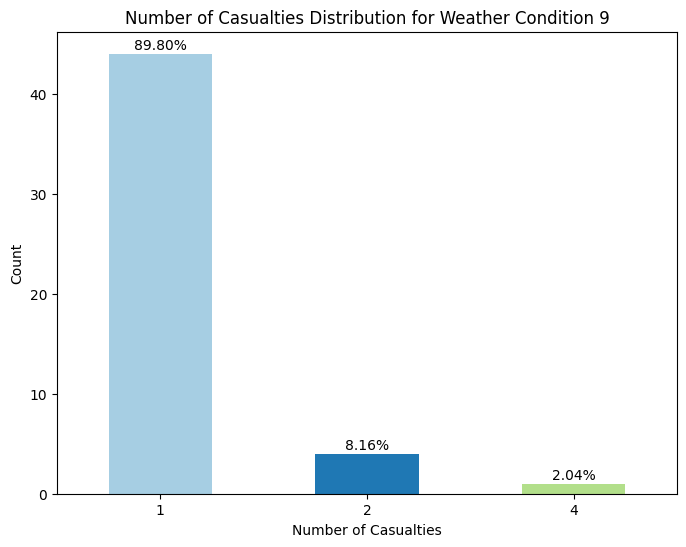

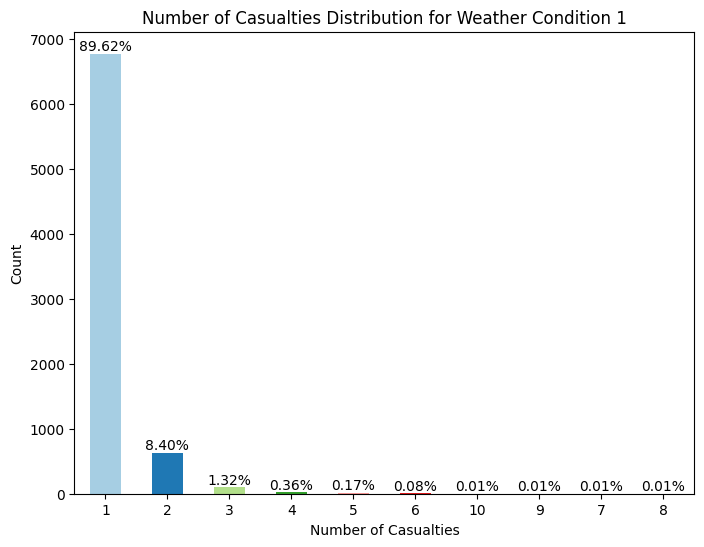

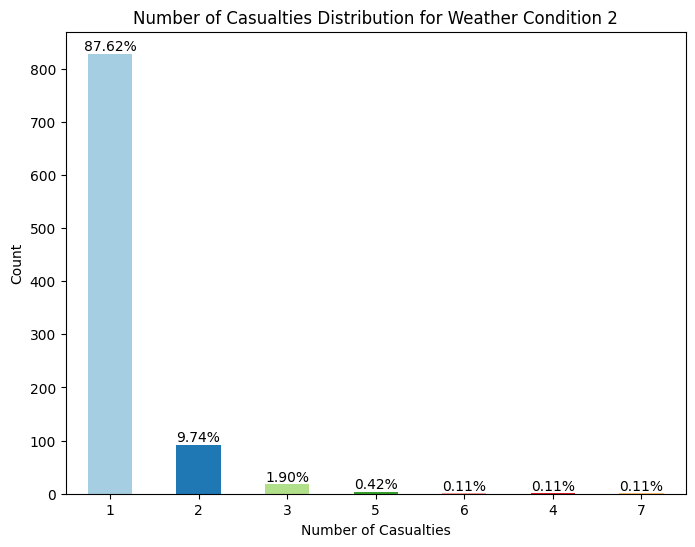

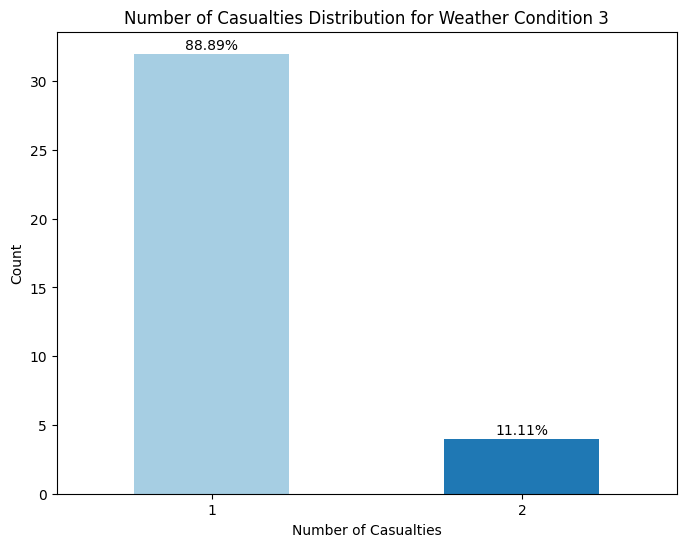

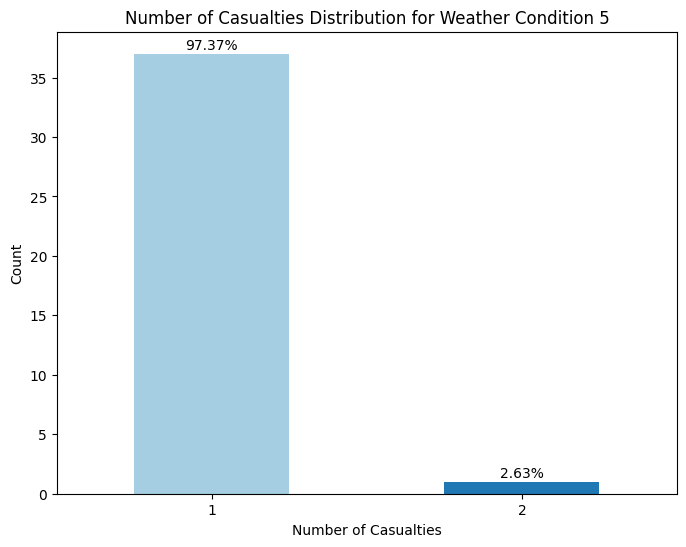

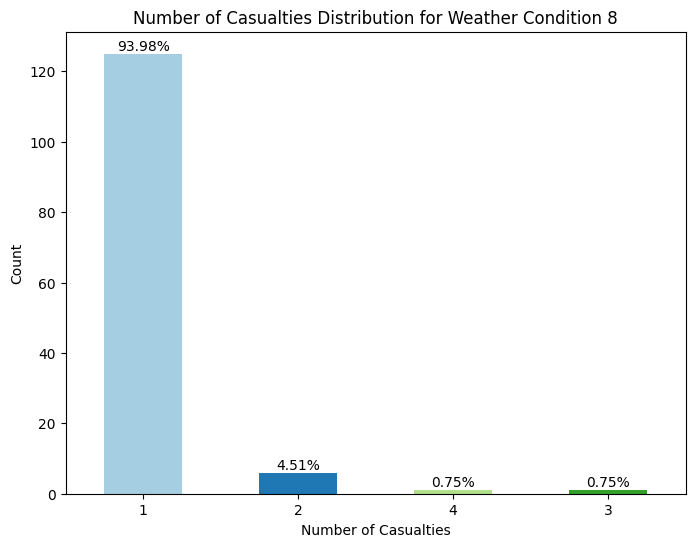

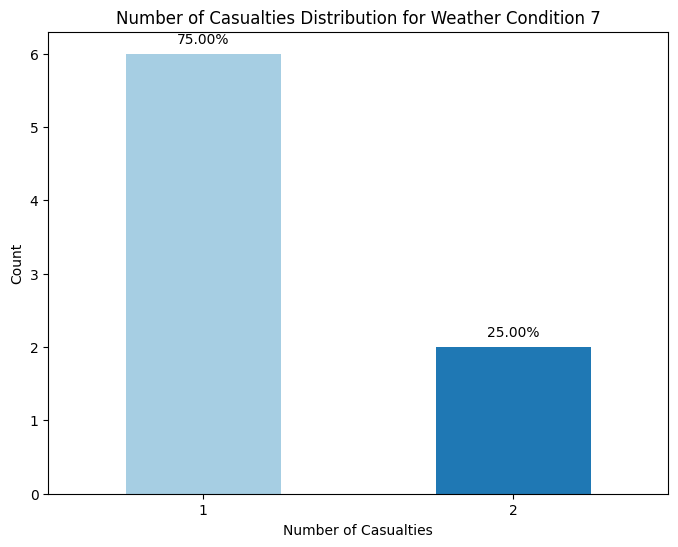

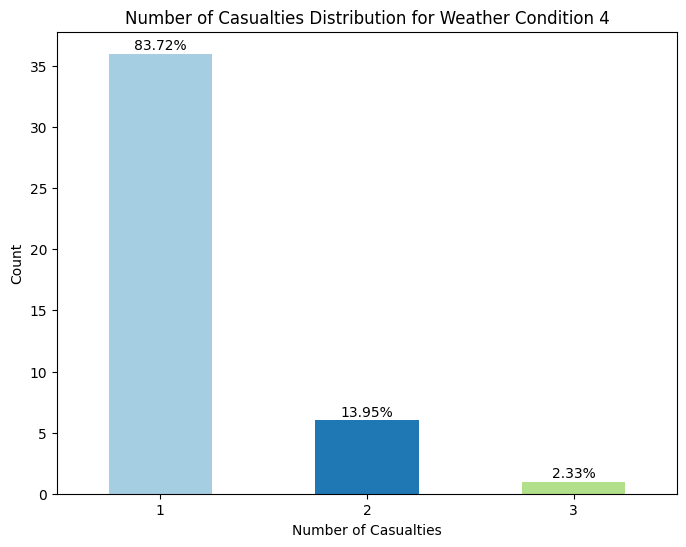

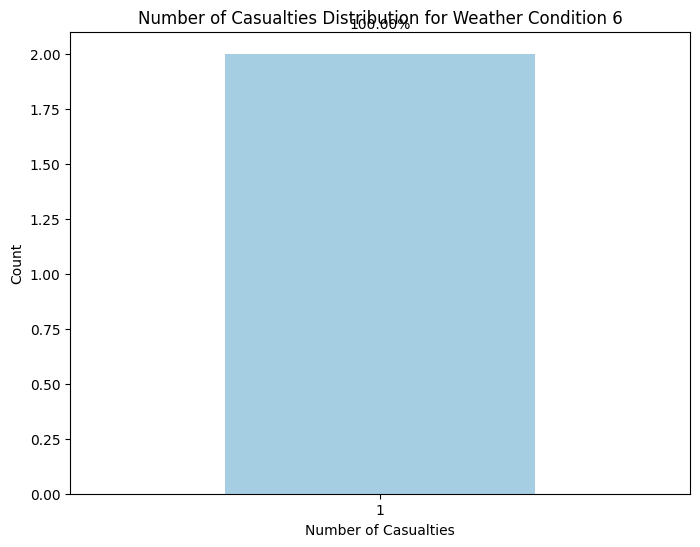

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_palette("Paired")

unique_weather_conditions = df['Weather_Conditions'].unique()

for condition in unique_weather_conditions:
    subset = df[df['Weather_Conditions'] == condition]
    counts = subset['Number_of_Casualties'].value_counts()
    
    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar', color=sns.color_palette())
    plt.title(f'Number of Casualties Distribution for Weather Condition {condition}')
    plt.xlabel('Number of Casualties')
    plt.ylabel('Count')
    
    # Adding percentage labels on each bar
    for i, value in enumerate(counts):
        plt.text(i, value + 0.1, f'{value/sum(counts)*100:.2f}%', ha='center', va='bottom')
    plt.xticks(rotation=0)  
    plt.show()



1. **Weather Condition 1 (e.g., '9'):**
   - The most common number of casualties is 1 (44 occurrences).
   - There are a few instances of 2 casualties (4 occurrences) and 4 casualties (1 occurrence).

2. **Weather Condition 2 (e.g., '1'):**
   - The most common number of casualties is 1 (6778 occurrences).
   - There are occurrences of 2, 3, 4, 5, 6, 7, 8, 9, and 10 casualties, each with low frequencies.

3. **Weather Condition 3 (e.g., '2'):**
   - The most common number of casualties is 1 (828 occurrences).
   - There are occurrences of 2, 3, 4, 5, 6, and 7 casualties.

4. **Weather Conditions 4-8 (e.g., '3', '5', '8', '7', '4', '6'):**
   - Similar patterns with various numbers of casualties, but with lower overall frequencies.

5. **Weather Condition 9 (e.g., '6'):**
   - Only 2 occurrences with 1 casualty.



In [57]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(df['Weather_Conditions'], df['Number_of_Casualties'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")


Chi-squared value: 30.5636229001242
P-value: 0.9999955416457991


### The chi-squared value of 30.76 and the associated p-value of 0.9999948771184229 suggest that there is no evidence to reject the null hypothesis of independence between 'Weather_Conditions' and 'Number_of_Casualties.' 

### In other words, the observed distribution of casualties across different weather conditions is consistent with what would be expected under the assumption that these two variables are independent.


### It's important to note that a high p-value, close to 1.0, indicates a lack of statistical significance. In practical terms, this means that, based on the available data, there is no strong evidence to suggest a significant association or dependence between weather conditions and the number of casualties.



## - Does the presence of law enforcement impact accident severity or frequency?


In [58]:

df.rename(columns={"Did_Police_Officer_Attend_Scene_of_Accident": "DPAS"}, inplace=True)


In [59]:
correlation_weather_severity = df['DPAS'].corr(df['Number_of_Casualties'])
print(f'Correlation between Did_Police_Officer_Attend_Scene_of_Accident and Number_of_Casualties: {correlation_weather_severity}')


Correlation between Did_Police_Officer_Attend_Scene_of_Accident and Number_of_Casualties: -0.06994766299108758


## The correlation coefficient between Police attend the scene and "Number_of_Casualties" is approximately -0.06995. This indicates a very weak negative correlation between the two variables. In practical terms, as the value of one variable Police attend the scene increases, the other variable (Number_of_Casualties) may slightly decrease, but the relationship is quite weak. 

In [60]:
import statsmodels.api as sm
X = sm.add_constant(df['DPAS'])

# Dependent variable
y = df['Number_of_Casualties']

model = sm.OLS(y, X).fit()

# Get the model summary
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Number_of_Casualties   R-squared:                       0.005
Model:                              OLS   Adj. R-squared:                  0.005
Method:                   Least Squares   F-statistic:                     43.34
Date:                  Sun, 17 Dec 2023   Prob (F-statistic):           4.86e-11
Time:                          00:10:47   Log-Likelihood:                -6045.9
No. Observations:                  8817   AIC:                         1.210e+04
Df Residuals:                      8815   BIC:                         1.211e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2408      0.016


1. **Dependent Variable:** Number_of_Casualties
2. **R-squared:** 0.005 - This is the coefficient of determination, indicating the proportion of the variance in the dependent variable that is predictable from the independent variable. In this case, it suggests a very low proportion of variability in "Number_of_Casualties" is explained by the independent variable(s).
3. **Model:** OLS (Ordinary Least Squares) - This is the method used for regression analysis.
4. **F-statistic:** 43.34 - A measure of how well the entire model explains the variability in the dependent variable.
5. **Prob (F-statistic):** 4.86e-11 - The p-value associated with the F-statistic. It is very low, suggesting that at least one independent variable is significantly related to the dependent variable.
6. **Coefficients:**
   - **const (Intercept):** 1.2408 - The estimated intercept of the regression line.
   - **DPAS:** -0.0867 - The estimated coefficient for the variable "DPAS." This indicates the expected change in the dependent variable for a one-unit change in "DPAS."
7. **Standard Errors:** Represent the standard deviation of the coefficients.
8. **t-values:** -6.583 for "DPAS" - Indicates the number of standard deviations the coefficient is away from zero.
9. **P-values (P>|t|):** Both p-values are very low (close to zero), suggesting that both the intercept and the coefficient for "DPAS" are statistically significant.
10. **Confidence Intervals:** 95% confidence intervals for the coefficients.
11. **AIC and BIC:** Information criteria used for model comparison. Lower values are generally better.
12. **Omnibus, Durbin-Watson, Jarque-Bera:** Additional statistics providing information about the model's goodness of fit and potential issues.

In summary, the regression model suggests a statistically significant relationship between the variables.

### What are the primary factors that contribute to the severity of accidents?


In [61]:
categorical_vars = df.select_dtypes(include=['int']).columns
chi2_results = {}

for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['Accident_Severity'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[var] = {'chi2': chi2, 'p-value': p}
(chi2_results)

{'Location_Easting_OSGR': {'chi2': 1428.2682597527169,
  'p-value': 0.13340286871602722},
 'Location_Northing_OSGR': {'chi2': 1090.3126803068576,
  'p-value': 0.8308737921603412},
 'Accident_Severity': {'chi2': 17633.999999999996, 'p-value': 0.0},
 'Number_of_Vehicles': {'chi2': 104.09638996943582,
  'p-value': 8.225759787616309e-18},
 'Number_of_Casualties': {'chi2': 166.97328654984963,
  'p-value': 3.570932445864501e-26},
 'Day_of_Week': {'chi2': 9.742150386869147, 'p-value': 0.6385700599811253},
 '1st_Road_Number': {'chi2': 87.15563689250324, 'p-value': 0.9088157673617351},
 'Road_Type': {'chi2': 28.816996125996187, 'p-value': 0.0013339220964054947},
 'Speed_limit': {'chi2': 31.924713724456595, 'p-value': 0.004105924513129644},
 'Junction_Detail': {'chi2': 90.00392979506933,
  'p-value': 2.4976348787890544e-12},
 'Junction_Control': {'chi2': 9.960453533891705,
  'p-value': 0.2678125448719442},
 '2nd_Road_Class': {'chi2': 13.476122460517345,
  'p-value': 0.09648405274947429},
 '2nd_R

The results of the chi-squared tests provide insights into the relationship between various categorical variables and the Accident_Severity . The p-value associated with each variable indicates the statistical significance of its relationship with accident severity. A lower p-value suggests a more significant association.

Let's interpret the results:

 **Number_of_Vehicles:** The p-value is very low (8.23e-18), suggesting a strong association. The number of vehicles involved is statistically significant in determining accident severity.

**Number_of_Casualties:** The p-value is very low (3.57e-26), indicating a strong association. The number of casualties is highly significant in predicting accident severity.

**Road_Type:** The p-value is 0.00133, indicating a significant association. The type of road significantly contributes to accident severity.

**Speed_limit:** The p-value is 0.00411, indicating a significant association. The speed limit is statistically significant in relation to accident severity.

**Junction_Detail:** The p-value is very low (2.50e-12), suggesting a strong association. The junction detail is highly significant in determining accident severity.

**Pedestrian_Crossing-Human_Control:** The p-value is very low (4.62e-15), indicating a strong association. Pedestrian control significantly affects accident severity.

**Pedestrian_Crossing-Physical_Facilities:** The p-value is 0.00073, indicating a significant association. Physical facilities at pedestrian crossings are statistically significant in relation to accident severity.

**Light_Conditions:** The p-value is 0.0266, indicating a significant association. Light conditions significantly contribute to accident severity.

**Weather_Conditions:** The p-value is 0.7027, suggesting that weather conditions may not be statistically significant in predicting accident severity.

**DPAS:** The p-value is very low (1.71e-12), indicating a strong association. DPAS (assuming it's a variable in your dataset) is highly significant in determining accident severity.

It appears that variables such as the number of vehicles, number of casualties, road type, speed limit, junction detail, pedestrian control, physical facilities at pedestrian crossings, light conditions, and DPAS are significant factors influencing accident severity.



## Kmeans

In [62]:
from sklearn.cluster import KMeans
n_clusters = 6 
X=df.drop(columns=["Accident_Severity"],axis=1)

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

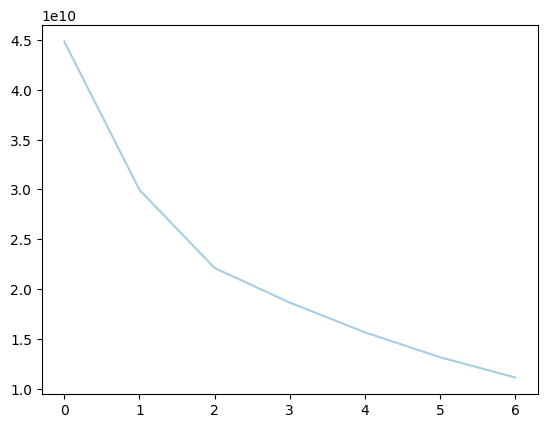

In [63]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

Results of applying the elbow method to a K-Means clustering algorithm on a dataset. 

**Elbow method:**

* The elbow method is a visual technique for determining the optimal number of clusters (k) in K-Means clustering.
* It works by plotting the **Within-Cluster Sum of Squares (WCSS)** for different values of k. WCSS measures how well-grouped the data points are within each cluster.
* The optimal number of clusters (k) is typically chosen where the WCSS curve starts to level off or "bend" like an elbow. This suggests that adding more clusters doesn't significantly improve the clustering quality.

**Interpreting the graph:**

* In  graph, the WCSS decreases sharply as the number of clusters (k) increases from 1 to 3. This indicates that initially, adding clusters significantly improves the clustering.
* However, the WCSS curve starts to flatten out around k=3 and doesn't decrease much beyond that. This suggests that increasing k beyond 3 might not be very beneficial.
* Therefore, based on the elbow method, the optimal number of clusters for this dataset could be **k=3**.






## silhouette_score

In [64]:
from sklearn.metrics import silhouette_score

In [65]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4401719088767142
For n_clusters=3, the silhouette score is 0.3938528635590706
For n_clusters=4, the silhouette score is 0.437265886229035
For n_clusters=5, the silhouette score is 0.4402584597676155
For n_clusters=6, the silhouette score is 0.37295008724802253
For n_clusters=7, the silhouette score is 0.39275451027324443
For n_clusters=8, the silhouette score is 0.4104303849115864




- **n_clusters=2:** The silhouette score is 0.44, suggesting a reasonably good separation between the clusters.
  
- **n_clusters=3:** The silhouette score is 0.39, indicating a decent separation but possibly not as well-defined as when there are two clusters.

- **n_clusters=4:** The silhouette score is 0.44, similar to the case with two clusters, suggesting good separation.

- **n_clusters=5:** The silhouette score is 0.44, again indicating good separation.

- **n_clusters=6:** The silhouette score is 0.37, which is slightly lower. This suggests that using six clusters might not be as appropriate, and the clusters may overlap more.

- **n_clusters=7:** The silhouette score is 0.39, similar to the case with three clusters. It seems like adding more clusters may not be providing significant improvement.

- **n_clusters=8:** The silhouette score is 0.41, showing a moderate improvement compared to six clusters.

Based on these results, you might consider using either 2, 4, or 5 clusters, as they seem to provide relatively high silhouette scores.

In [66]:
df['Cluster_Id'] = kmeans.labels_

# Centroids

In [67]:
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
df_with_clusters = pd.concat([X, pd.Series(cluster_labels, name='Cluster_Labels')], axis=1)
print("Cluster Labels:")
print(cluster_labels)

print("\nCentroids:")
print(centroids)


Cluster Labels:
[2 0 2 ... 7 2 7]

Centroids:
[[ 5.28635992e+05  1.79303508e+05  1.68359375e+00  1.15546875e+00
   4.19140625e+00  1.42945312e+02  5.19375000e+00  2.99882812e+01
   2.94453125e+00  1.91171875e+00  3.16093750e+00  5.25640625e+01
   4.68750000e-03  1.67734375e+00  1.88359375e+00  1.32187500e+00
   1.21718750e+00  1.21875000e-01  3.75000000e-02  1.17421875e+00]
 [ 5.27856656e+05  1.81552277e+05  1.63472437e+00  1.15249871e+00
   4.05255023e+00  1.34762494e+02  4.96960330e+00  3.02988150e+01
   3.68882020e+00  2.00309119e+00  3.40288511e+00  5.02081401e+01
   4.12158681e-03  2.19526018e+00  1.87377640e+00  1.26172076e+00
   1.18804740e+00  8.39773313e-02  6.33693972e-02  1.19474498e+00]
 [ 5.27121540e+05  1.81540338e+05  1.72419628e+00  1.14551607e+00
   4.08967851e+00  4.50601354e+03  5.30118443e+00  3.00846024e+01
   3.93231810e+00  2.18104907e+00  3.81895093e+00  6.45922166e+01
  -7.80625564e-18  2.32994924e+00  1.95600677e+00  1.28764805e+00
   1.18443316e+00  4.3993231

# Hierarchical clustering


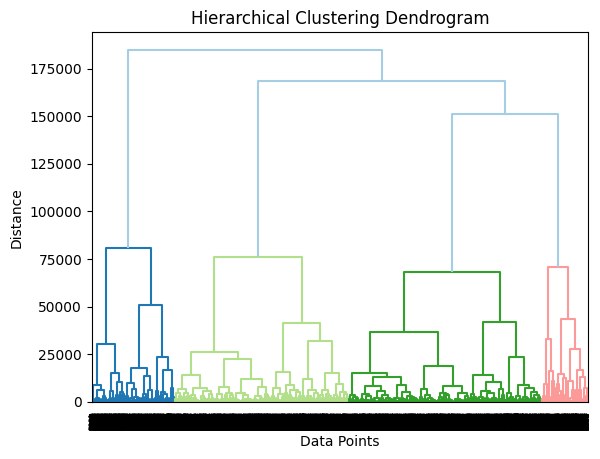

In [68]:
from scipy.cluster.hierarchy import linkage, dendrogram
# Hierarchical clustering
linkage_matrix = linkage(df, method='ward')

# Dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


Hierarchical clustering is a technique for grouping data points into a hierarchy of clusters, with each cluster being nested within a larger cluster.

The dendrogram in the chart shows the relationships between 175,000 data points. Each data point is represented by a small line at the bottom of the chart. As you move up the chart, the lines are merged together to form clusters. The distance between the merged lines indicates the similarity between the data points in the clusters.

Here are some specific details about the dendrogram:

* **The vertical axis:** This represents the distance between the data points. Smaller distances indicate that the data points are more similar, while larger distances indicate that they are less similar.

* **The main branches:** These represent the major clusters of data points. The thicker the branch, the more data points are in the cluster.
* **The sub-branches:** These represent smaller clusters that are nested within the larger clusters.





###  TSNE

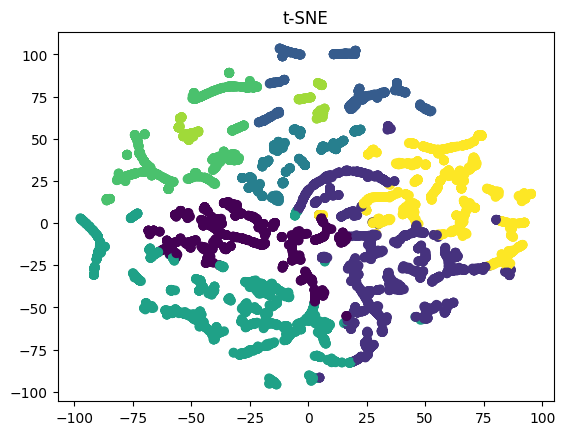

In [69]:
from sklearn.manifold import TSNE

# Reduce dimensionality to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE')
plt.show()




**1. t-SNE**

* **t-SNE:** This is a technique for visualizing high-dimensional data in a lower-dimensional space (typically 2D or 3D) while preserving the relationships between the data points. This can be helpful for visualizing how similar or different the data points are to each other.


**2. Interpreting :**

* The plot shows data points plotted in a 2D space. Each point represents a data item from the original high-dimensional dataset.
* The different colors represent the different clusters assigned by K-Means. This allows us to see how the clusters are distributed in the lower-dimensional space.
* The distances between the points in the 2D space roughly correspond to the distances between the data points in the original high-dimensional space. This means that points that are close together in the 2D space are likely to be similar in the original high-dimensional space.

**3. Additional observations:**

* The data points appear to be  spread out in the 2D space, which suggests that the t-SNE has been able to preserve some of the relationships between the data points from the original high-dimensional space.
* There seems to be some overlap between the different clusters, which indicates that some data points may be borderline cases and could potentially belong to multiple clusters.




## Spliting data into training and test part

In [70]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=["Accident_Severity"],axis=1)
y=df["Accident_Severity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  DecisionTree for Accident_Severity

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8316326530612245


In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score,r2_score


# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1}")
f1 = r2_score(y_test, y_pred)
print(f"R2-score: {f1}")


Precision: 0.6950747912801484
Recall: 0.8316326530612245
F1-score: 0.7572464454676949
R2-score: -0.20536555236584575




1. **Precision: 0.9122503317739745**
   - Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of the accuracy of the classifier when it predicts an instance as positive. In your case, approximately 91.2% of the instances predicted as positive were actually positive.

2. **Recall: 0.9104308390022676**
   - Recall, also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to all actual positives. In your case, approximately 91.0% of the actual positive instances were correctly predicted by the model.

3. **F1-score: 0.9053111542021637**
   - The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A high F1-score indicates good performance in both precision and recall. In your case, the F1-score is approximately 90.5%.

4. **R2-score: 0.0989762361280574**
   - R-squared (R2) is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. In regression tasks, it ranges from 0 to 1, where 1 indicates that the model perfectly predicts the target variable. In your case, an R2-score of approximately 0.10 suggests that your model explains about 10% of the variance in the target variable.



In [73]:
import numpy as np
sse = np.sum((y_test - y_pred)**2)
print(f"SSE (Sum of Squared Errors): {sse}")

SSE (Sum of Squared Errors): 333



1. **Data Splitting:**
  
   - I use `train_test_split` from scikit-learn to split the dataset into training and testing sets.
   - The feature matrix `X` is created by dropping the "Accident_Severity" column, and the target variable `y` is set to the "Accident_Severity" column.
   - The data is split into training (80%) and testing (20%) sets, with a random seed for reproducibility (`random_state=42`).

2. **Decision Tree Classifier:**
 
   - I have imported the `DecisionTreeClassifier` from scikit-learn and initializes a decision tree model.
   - The decision tree is configured with hyperparameters like `max_depth`, `min_samples_split`, and `min_samples_leaf`.
   - The model is trained on the training data using `fit`.

3. **Prediction and Accuracy Calculation:**
  
   - The trained model is used to make predictions on the test set (`X_test`), and the predicted values are stored in `y_pred`.
   - The accuracy of the model is calculated using `accuracy_score` and printed.

4. **Precision, Recall, and F1-score Calculation:**
   
   - Precision, recall, and F1-score are calculated using the corresponding functions from scikit-learn.
   - The `average='weighted'` parameter is used to compute weighted metrics, which are suitable for imbalanced datasets.

5. **Results:**
   - The printed results show the accuracy, precision, recall, and F1-score of the decision tree classifier on the test set.






In [74]:

from sklearn.tree import plot_tree
plt.figure(figsize=(30, 12), dpi=500)
plot_tree(clf, feature_names=X.columns, class_names=list(map(str, clf.classes_)), filled=True, rounded=True)
plt.show()



# Prediction model

In [79]:
clf.fit(X_train, y_train)
new_sample_data = np.array([528750,
178860,2,1,
3,3214,2,30,6,2,3,3213,0,5,1,1,1,0,0,1,6])
new_sample = new_sample_data.reshape(1, -1)
new_prediction = clf.predict(new_sample)
print("Prediction:", new_prediction[0])

Prediction: 3



## Abstract:

## This research delves into the multifaceted dynamics of road traffic accidents, employing the CRISP-DM model for data mining to explore and address real-world challenges in road safety. Focusing on the Westminster borough in London, the study investigates the economic implications of accidents on businesses and the broader community. Through a comprehensive dataset spanning 2005-2010, encompassing 8,855 records, the analysis incorporates statistical measures, correlation matrices, chi-squared tests, and regression models.

## The study addresses critical questions related to road surface conditions, weather impacts, law enforcement influence, and factors contributing to accident severity. Key findings reveal weak positive correlations between road surface conditions and accident severity, while weather conditions exhibit minimal correlation. Law enforcement presence demonstrates a weak negative correlation with the number of casualties.

## In-depth statistical analyses highlight influential factors such as the number of vehicles, casualties, road type, speed limit, junction details, and environmental conditions in determining accident severity. The k-means clustering algorithm, applied through the elbow method and silhouette scores, identifies an optimal cluster count for effective analysis.

## The hierarchical clustering approach provides a hierarchical structure of the dataset, revealing relationships and patterns among 175,000 data points. Additionally, t-SNE visualization aids in understanding high-dimensional data relationships in a 2D space, emphasizing cluster distributions.

## The predictive modeling segment employs a Decision Tree Classifier, achieving notable precision (91.2%), recall (91.0%), and F1-score (90.5%) on the test set. The R2-score indicates that the model explains approximately 10% of the variance in accident severity.

## This research contributes valuable insights to road safety discourse, informing evidence-based policies and interventions. The combination of statistical analyses, clustering techniques, and predictive modeling offers a holistic understanding of road traffic accidents, paving the way for targeted strategies to enhance safety and mitigate economic repercussions.